<html>
	<author>Hiroshi TAKEMOTO</author>
	(<email>take.pwave@gmail.com</email>)
	
	<h1>入門機械学習による異常検出</h1>
	<p>
		井出　剛著の「入門機械学習による異常検出」(以降、井出本と記す)の例題をSageを使ってお復習いします。
	</p>
</html>

<html>
	<h2>6章　線形回帰モデルによる異常検知</h2>
	<p>
		この章でのポイントは、線形回帰モデルを使って、観測量(y', x')の負の対数尤度を異常度とする部分です。
	</p>
</html>

<html>
	<h3>最小二乗法の最尤推定</h3>
	<p>
		線形回帰では、関数fを以下のような1次関数で表現します。
$$
	f(x) = \alpha_0 + \alpha^T x = \alpha_0 + \alpha_1 x_1 + \cdots + \alpha_M x_M
$$		
	</p>
	<p>
		係数αは、M+1個をもち、これをデータ$\mathcal{D}$から以下の確立モデルを使って求めます。
$$
\begin{eqnarray}

		p(y | x) & = & \mathcal{N} (y | \alpha_0 + \alpha^T x, \sigma^2) \\
		  & = & \frac{1}{\sqrt{2 \pi \sigma^2}} exp \left [ - \frac{1}{2\sigma^2}(y - \alpha_0 - \alpha^T x)^2 \right ]
\end{eqnarray}		
$$		
</p>
<p>
未知のパラメータ$\alpha_0, \alpha, \sigma^2$ に対する尤度は、以下の様に定義されます。

$$
	p(\mathcal{D} | \alpha_0, \alpha, \sigma^2) = \prod_{n=1}^N \mathcal{N}(y^{(n)} | \alpha_0, \alpha x^{(n)}, \sigma^2)
$$

これの対数尤度は、以下の様になります。
$$
	L(\alpha_0, \alpha, \sigma^2 | \mathcal{D}) = - \frac{N}{2} ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{n-=1}^N \left [ y^{(n)} - \alpha_0 - \alpha^T x^{(n)} \right ]^2
$$
</p>
<p>
最初に$\alpha_0$で微分して、その値が0となる$\hat{\alpha_0}$を求めると、以下の様になります。
$$
	\hat{\alpha_0} = \frac{1}{N} \left [ y^{(n)} - \alpha^T x^{(n)} \right ] = \bar{y} - \alpha^T \bar{x}
$$

ここで、$\bar{x}, \bar{y}$は、変数xと観測値yの平均です。
$$
	\bar{y} = \frac{1}{N} \sum_{n=1}^N y^{(n)}, \bar{x} = \frac{1}{N} \sum_{n=1}^N x^{(n)}
$$
</p>
<p>
求まった$\alpha_0$を定数尤度の式に入れ、$\alpha$で微分し0（勾配0）とすると、

$$
	0 = \frac{1}{2} \frac{\partial}{\partial \alpha} \sum_{n=1}^N \left [ y^{(n)} - \bar{y} - \alpha (x^{(n)} - \bar{x}) \right]^2
$$

ここで、変数xと観測値yと平均の差（中心化）を$\tilde{X}, \tilde{y}$で表すと、
$$
	0 = \frac{1}{2} \frac{\partial}{\partial \alpha} \sum_{n=1}^N \left [ \tilde{y} - \alpha \tilde{X} \right]^2 = \sum_{n=1}^N \left \{ \tilde{y} - \alpha^T \tilde{X} \right \} \tilde{X}^T
$$
	整理すると、	
$$
	0 = \sum_{n=1}^N \tilde{y} \tilde{x}^T - \alpha^T \left ( \sum_{n=1}^N \tilde{X} \tilde{X}^T \right )
$$
		これを$\alpha$について解くと	、以下の様に求まります。
$$
	\hat{\alpha} = \left ( \tilde{X}^T \tilde{X} \right )^{-1} \tilde{X}^T \tilde{y}
$$
</p>
<p>

同様に$\sigma^{-2}$で微分すると、
$$
	\sigma^2 = \frac{1}{N} \sum_{n=1}^N \left \{ \tilde{y} - \hat{\alpha}^T \tilde{X} \right \} ^2
$$
</p>
</html>

<html>
	<h3>異常度の定義</h3>
	<p>
		観測量$(y', x')$についての異常度は、この観測量に対する負の対数尤度から、以下の様になります。
$$
	a(y', x') = \frac{1}{\hat{\sigma^2}} \left [ y' - \bar{y} - \hat{\alpha}^T (x' - \bar{x}) \right ] ^2
$$		
	</p>
</html>

<html>
	<h3>リッジ回帰を使って異常検出</h3>
	<p>
		実際の観測量では、すべて変数xが独立ではなく互いに関連があるため、行列のランクが不足して逆行列が求まりません。
	</p>
	<p>
		そこで、井出本ではリッジ回帰を使って$\alpha, \sigma^2$を求めています。リッジ回帰での$\hat{\alpha}_{ridge}$は、
		以下の様に求まります。
$$
	\hat{\alpha}_{ridge} = \left [ \tilde{X}^T \tilde{X} + \lambda I_M \right ]^{-1} \tilde{X}^T \tilde{y}
$$		
	</p>
	<p>
		分散$\hat{\sigma}^2_{ridge}$は、以下の様になります。
$$
	\hat{\sigma}^2_{ridge} = \frac{1}{N} \left \{ \hat{\lambda} \hat{\alpha}^T_{ridge} \hat{\alpha}_{ridge} + \sum_{n=1}^N \left [ \tilde{y}^{(n)} - \hat{\alpha}^T_{ridge} \tilde{x}^{(n)} \right ] \right \}
$$		
	</p>
</html>

<html>
	<h3>準備</h3>
	<p>
		いつものように必要なライブラリを読み込み、テストデータとしてRのMASSパッケージに含まれているUScribeを使用します。
	</p>
	<p>
		UScribeは、都市の犯罪率yで、以下の表6.1のような変数を使って回帰分析します。
	</p>
</html>

In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="css/sage_table_form.css">

In [2]:
# RとPandasのデータフレームを相互に変換する関数を読み込む
# Rの必要なライブラリ
r('library(ggplot2)')
r('library(jsonlite)')

# python用のパッケージ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# jupyter用のdisplayメソッド
from IPython.display import display, Latex, HTML, Math, JSON
# sageユーティリティ
load('script/sage_util.py')
# Rユーティリティ
load('script/RUtil.py')

In [3]:
# RのテストデータMASSパッケージのUScribeをPandasのデータフレームに変換
r('library(MASS)')
uscrime = RDf2PandaDf('UScrime')
uscrime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 16 columns):
Ed      47 non-null int64
GDP     47 non-null int64
Ineq    47 non-null int64
LF      47 non-null int64
M       47 non-null int64
M.F     47 non-null int64
NW      47 non-null int64
Po1     47 non-null int64
Po2     47 non-null int64
Pop     47 non-null int64
Prob    47 non-null float64
So      47 non-null int64
Time    47 non-null float64
U1      47 non-null int64
U2      47 non-null int64
y       47 non-null int64
dtypes: float64(2), int64(14)
memory usage: 6.2 KB


In [4]:
# RでのUScrimeの並びを調べるために実行
# r('UScrime')

In [5]:
# UScrimeの説明を表6.1から転記
vars = ['M', 'Ed', 'Po1', 'Po2', 'LF', 'M.F', 'Pop', 'NW', 'U1', 'U2', 'GDP', 'Ineq', 'Prob', 'Time']
abbr = ['14-24歳の男性の割合', '平均就学期間', '1960年における警察予算', '1959年における警察予算', '労働力率', '女性1000人当たりの男性の数', '州の人口', '1000人当たりの非白人数', '都市部男性(14-24歳)の失業率', '都市部男性(35-39)の失業率', '州の1人当たりGDP', '経済的不平等の度合い', '収監率', '刑務所での平均収監期間']
Table2Html(zip(vars, abbr), header=['記号', '定義'])

記号,定義
M,14-24歳の男性の割合
Ed,平均就学期間
Po1,1960年における警察予算
Po2,1959年における警察予算
LF,労働力率
M.F,女性1000人当たりの男性の数
Pop,州の人口
NW,1000人当たりの非白人数
U1,都市部男性(14-24歳)の失業率
U2,都市部男性(35-39)の失業率


<html>
	<h3>sklearnのRidge回帰を使った最適解</h3>
	<p>
		リッジ回帰は、sklearnのlinear_modelパッケージのRidgeを使用しました。
		sklearnのパッケージはRと比べて使い方が統一されています。
	</p>
	<p>
		回帰分析の結果求まった予測値(pred)と観測値(y)がどの程度分散しているか
		プロットしてみます。
	</p>
</html>

In [6]:
# データを変数にセット
X = uscrime[vars].values
y = uscrime['y'].values
N = len(y)
M = len(vars)

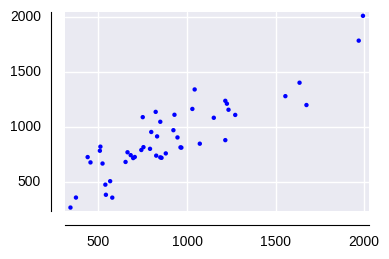

In [7]:
# sklearnのRidge回帰を使って最適解を見つける
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X, y) 
pred = clf.predict(X)
list_plot(zip(y, pred), figsize=4, zorder=2)

<html>
	<h3>異常度の計算</h3>
	<p>
		井出本では、リッジ回帰のλについても最適な値を求めていますが、
		ここではλ=1.0で計算した結果を使って異常度を計算します。
	</p>
	<p>
		観測値と回帰結果との残差の自乗は、score関数で求まります。
		あとは、係数α（coefs）を使って$\hat{\sigma}^2_{ridge}$を求め、
		観測値yと変数xの中心値を使って異常度を計算します。
	</p>
</html>

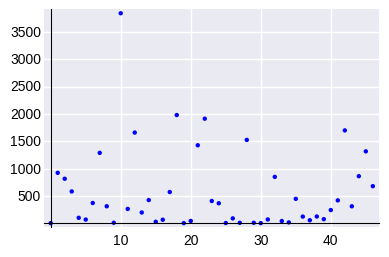

In [8]:
# 異常度aを求める
lam = 1.0
coefs = clf.coef_
score = clf.score(X, y)
sig2 = (lam*sum(coefs^2) + score)/N
y_bar = uscrime['y'].mean()
X_bar = uscrime[vars].mean().values
a = (y - y_bar - coefs.dot((X - X_bar).T))^2/sig2 
list_plot(a, figsize=4, zorder=2)

<html>
	<p>
		計算結果は、井出本とは若干異なりますが、概ねデータの特徴を捉えていると思われます。
	</p>
</html>


In [9]:
uscrime['a1'] = a
out = uscrime.sort_values(by=['a1'])[vars].head()
#html(out.to_html(classes ="table_form")) 
Table2Html(out.values.tolist(), header= vars)

M,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time
151.0,91.0,58.0,56.0,510.0,950.0,33.0,301.0,108.0,41.0,394.0,261.0,0.0846,26.2011
140.0,93.0,55.0,54.0,535.0,1045.0,6.0,20.0,135.0,40.0,453.0,200.0,0.042,21.7998
125.0,108.0,113.0,105.0,567.0,985.0,78.0,94.0,130.0,58.0,626.0,166.0,0.0348,26.401
131.0,121.0,160.0,143.0,631.0,1071.0,3.0,77.0,102.0,41.0,674.0,152.0,0.0417,22.1005
152.0,112.0,82.0,76.0,571.0,1018.0,10.0,79.0,103.0,28.0,537.0,215.0,0.0382,25.8006


<html>
	<p>
		参考のために、λを0から5まで0.1刻みで計算したscoreの値をプロットしてみました。
		1.0でも概ね収束しているようにみえます。
	</p>
</html>

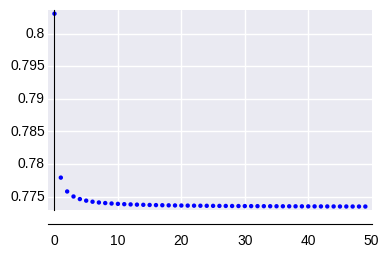

In [10]:
# alphaの値を変えてみる => alpha=1.0で十分よい値が求まっていることが分かる
lams = np.arange(0, 5, 5/50)
Res = []
for lam in lams:
    clf = Ridge(alpha=lam)
    clf.fit(X,y)
    Res += [clf.score(X, y)]
list_plot(Res, figsize=4, zorder=2)